# Naive Bayes With Gaussian Predictors

We've played around with NB using Multinomial (and possibly Bernoulli) likelihood models through the `naive_bayes` classses:

* MultinomialNB()
* BernoulliNB()

We're going to try using the `GaussianNB` class now. Now, our features should be continuous (and normally distributed) in predicting our response variable `y` (which is binomial).


In [1]:
import numpy as np
import pandas as pd
from sklearn import naive_bayes
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb

from sklearn import datasets

In [85]:
data = datasets.load_boston()
print data.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [109]:
# Convert data into a Pandas dataframe for ease
data_df = pd.DataFrame( data.data, columns=data.feature_names)
data_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [90]:
# Let's say we want to predict whether a home is next to the Charles river
# Based on the median value and how much crime is in the area
X = pd.DataFrame( {'MEDV': data.target,'CRIM':(data_df.CRIM)} )
y = data_df['CHAS']

In [99]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold

In [129]:
# Cross validate to get accuracy
gnb = naive_bayes.GaussianNB()
cvscores = cross_val_score(gnb,X,y,cv=KFold(len(X),n_folds=10,shuffle=True))
np.mean(cvscores)

0.91305882352941181

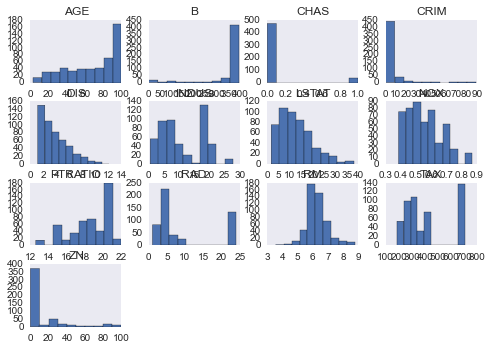

In [88]:
# Take a look at the histograms of the features
f = plt.figure(figsize=(5,5))
f = data_df.hist(grid=False)



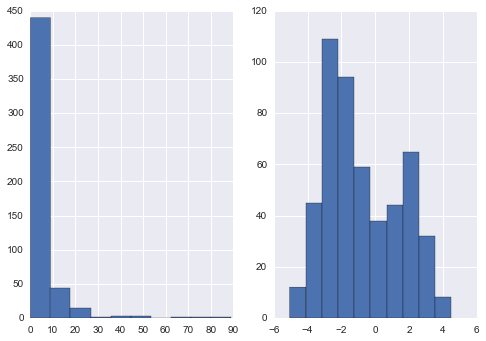

In [131]:
# Ah, the CRIM feature isn't really normally distributed, which is one of the
# Assumptions in using GaussianNB
plt.subplot(1,2,1)
f = plt.hist( data_df.CRIM)
plt.subplot(1,2,2)
f = plt.hist( np.log(data_df.CRIM) )

In [132]:
# Let's transform the CRIM to be more normal through a log distribution
X = pd.DataFrame( {'MEDV': data.target,'CRIM':np.log(data_df.CRIM)} )
y = data_df['CHAS']

In [140]:
# Slightly better cross validated results
gnb = naive_bayes.GaussianNB()
cvscores = cross_val_score(gnb,X,y,cv=KFold(len(X),n_folds=10,shuffle=True))
np.mean(cvscores)

0.9210196078431373